<a href="https://colab.research.google.com/github/elly760/AI-projects/blob/main/AI_%20Regression/decision%20tree/%20random%20forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
dataset_dir="/content/drive/MyDrive/AI-Data.csv"

In [ ]:
import pandas as pd
df=pd.read_csv(dataset_dir, encoding="latin-1")


In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# CHECKING FOR THE MISSING VALUES
null_values=df.isna().sum()
null_values

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# DROP AL THE ROWS WITH NULL VALUES
df=df.dropna()


In [ ]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
# df=df.drop(columns=["InvoceDateNorm"])

KeyError: "['InvoceDateNorm'] not found in axis"

In [ ]:
# CONVERTING THE InvoceDate COLUMN TO YEAR, MONTH, DAY, HOUR, MINUTE, SECOND
# convert the colmn to date time to date time formart
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"])


In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
# LETS NOW EXTRACT THE SPECIFIC PARAMETERS FROM THE DF
df["Year"]=df["InvoiceDate"].dt.year
df["Month"]=df["InvoiceDate"].dt.month
df["Day"]=df["InvoiceDate"].dt.day
df["Hour"]=df["InvoiceDate"].dt.hour
df["Minute"]=df["InvoiceDate"].dt.minute
df["Second"]=df["InvoiceDate"].dt.second

In [ ]:
# DAYS OF THE WEEK
# Convert day of the week to numerical values (Monday=1, Tuesday=2, etc.)
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek + 1  # Adding 1 to make Monday=1, ..., Sunday=7


In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,DayOfWeek
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,3


In [ ]:
# ANALYZING THE DATA
# NUMBER OF ORDERS MADE BY THE CUSTOMER EACH DAY
orders_per_day=df.groupby(df["DayOfWeek"]).size()
orders_per_day

DayOfWeek
1    66382
2    68110
3    70599
4    82374
5    56127
7    63237
dtype: int64

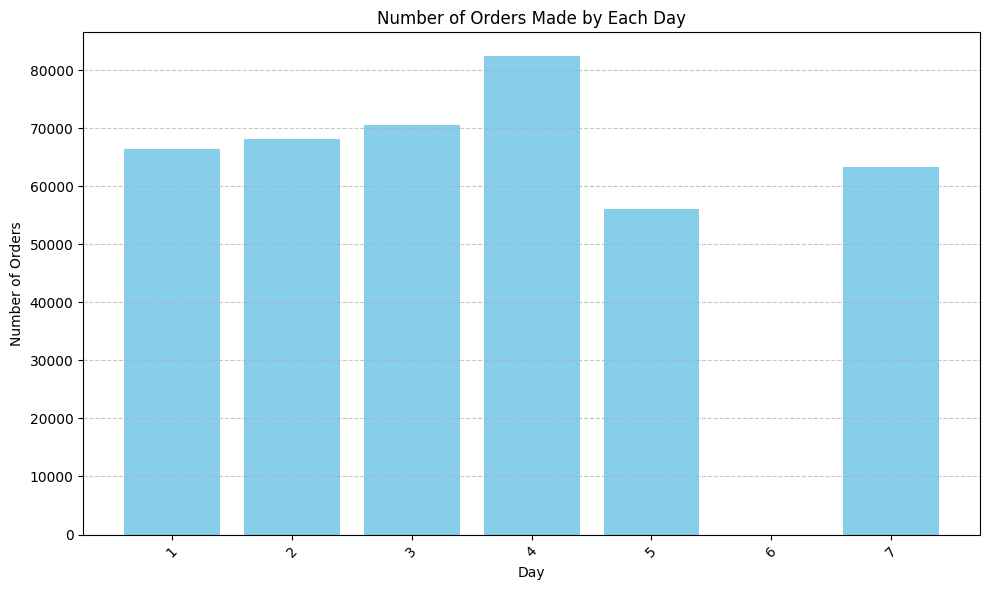

In [ ]:
import matplotlib.pyplot as plt

# Assuming orders_per_day is the Series containing the number of orders made by each day

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(orders_per_day.index, orders_per_day.values, color='skyblue')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Made by Each Day')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
# CREATING THE TOTAL PRICE COLUMN
df["TotalPrice"]=df["Quantity"]*df["UnitPrice"]

In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,DayOfWeek,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,3,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,3,20.34


In [ ]:
# CALCULATIN THE TOTALOF SPENDING FOR EACH CUSTOMER
df["Total Customer Exp"]=df.groupby("CustomerID")["TotalPrice"].sum()
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,DayOfWeek,TotalPrice,Total Customer Exp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,3,15.30,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,3,20.34,NaN


In [ ]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,DayOfWeek,TotalPrice,Total Customer Exp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,3,15.30,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,3,20.34,NaN


In [ ]:
# TOTAL DAILY CUSTOMER EXPENCES
# Group the DataFrame by 'CustomerID' and calculate the sum of 'TotalAmount' for each group
total_spending_per_customer = df.groupby('CustomerID')['TotalPrice'].sum()

# Print the total spending for each customer
df.head(3)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,DayOfWeek,TotalPrice,Total Customer Exp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,3,15.30,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,3,20.34,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,3,22.00,NaN


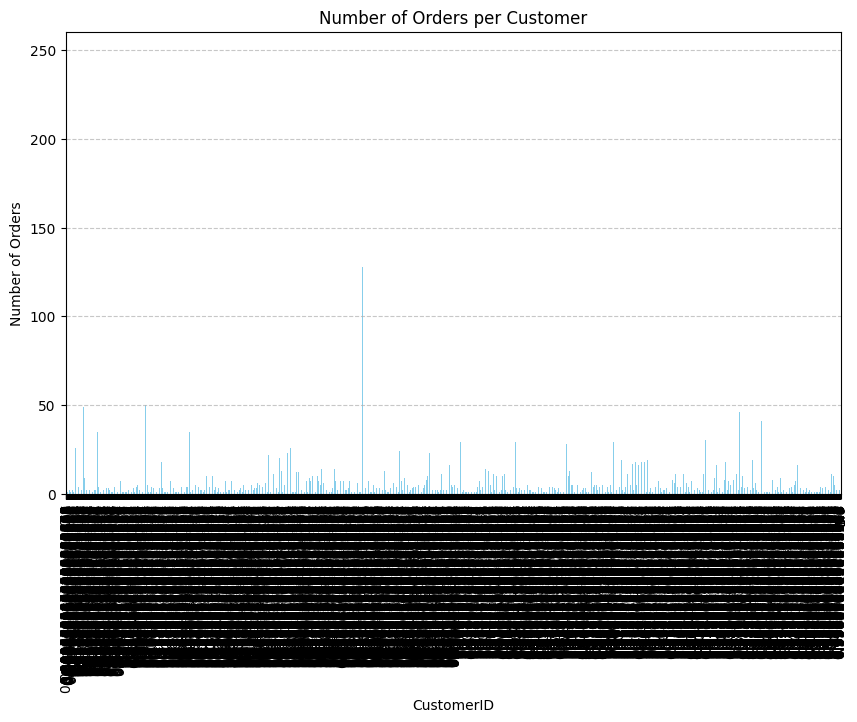

In [123]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame containing the data with columns 'CustomerID' and 'InvoiceNo'

# Group the data by 'CustomerID' and count the number of unique orders for each customer
orders_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

# Visualize the number of orders made by each customer
plt.figure(figsize=(10, 6))
orders_per_customer.plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
# plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.tight_layout()
plt.show()


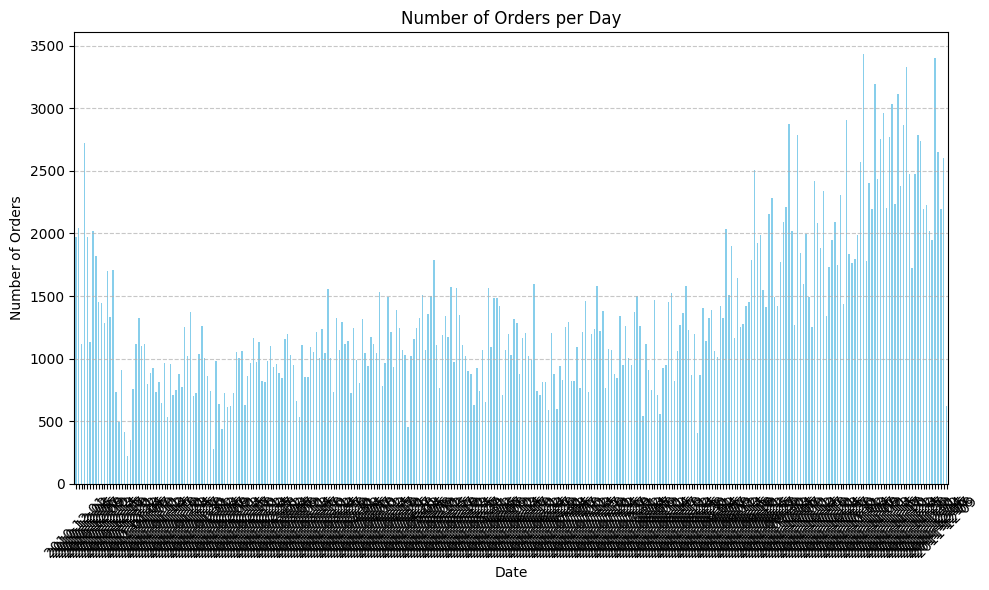

In [121]:
# NUMBER OF ORDERS PER DAY
import matplotlib.pyplot as plt

# Group the data by date and count the number of orders for each date
orders_per_day = df.groupby(df['InvoiceDate'].dt.date).size()

# Visualize the number of orders per day
plt.figure(figsize=(10, 6))
orders_per_day.plot(kind='bar', color='skyblue')
plt.title('Number of Orders per Day')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

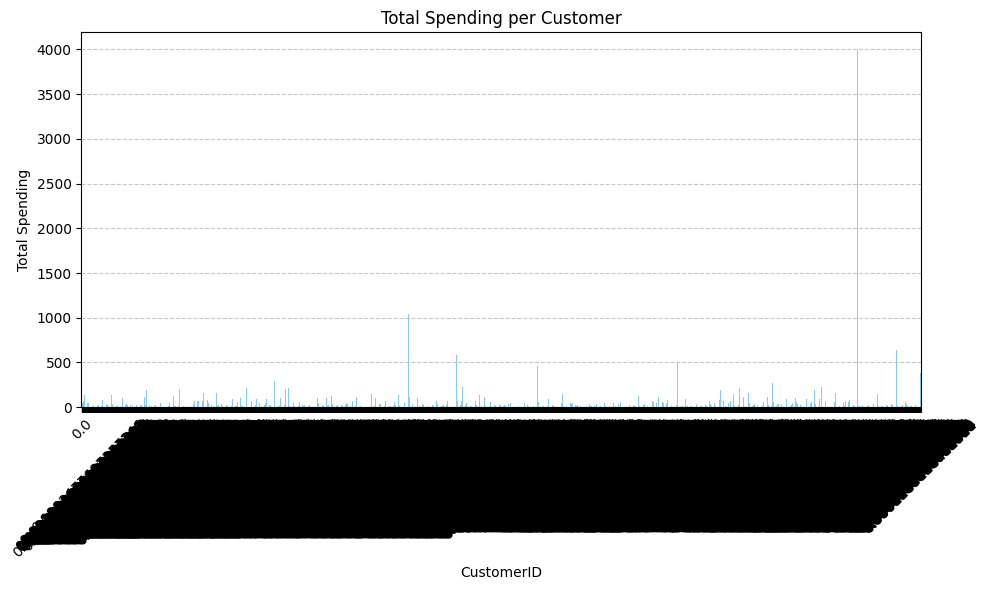

In [118]:
# CALCULATING THE TOTAL NUMBER OF ORDERS MADE PER MONTH AN VISUALIZING THE RESULTS
import matplotlib.pyplot as plt

import pandas as pd
import matplotlib.pyplot as plt
# Group the data by 'CustomerID' and calculate the total spending for each customer
total_spending_per_customer = df.groupby('CustomerID')['TotalPrice'].sum()

# Visualize the total spending for each customer
plt.figure(figsize=(10, 6))
total_spending_per_customer.plot(kind='bar', color='skyblue')
plt.title('Total Spending per Customer')
plt.xlabel('CustomerID')
plt.ylabel('Total Spending')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


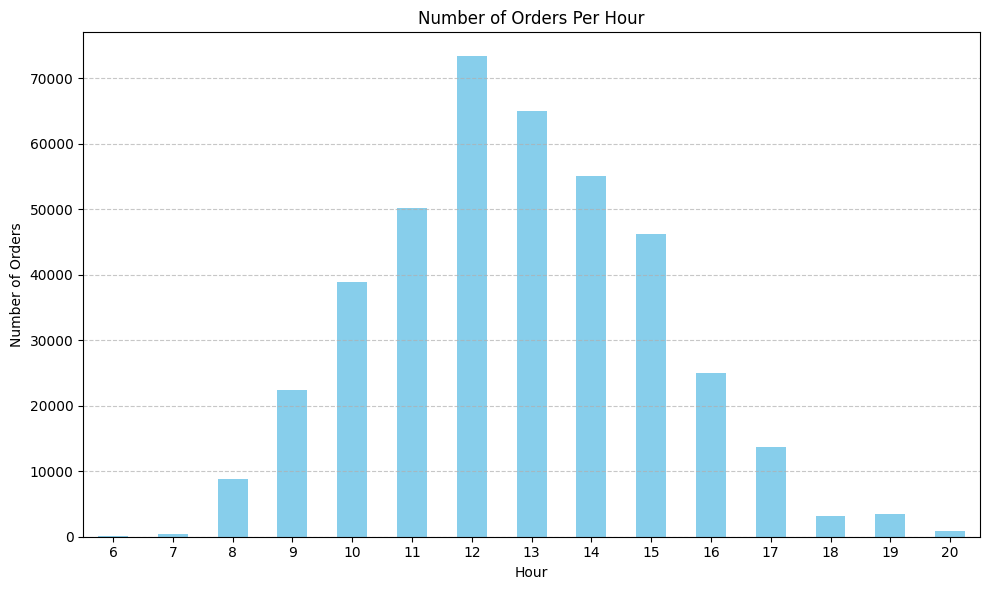

In [ ]:
# NUMBER OF ORDERS PER HOUR
import matplotlib.pyplot as plt

# Assuming 'InvoiceDate' is your datetime column
# Convert 'InvoiceDate' to datetime if it's not already in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Extract hour from 'InvoiceDate'
df['Hour'] = df['InvoiceDate'].dt.hour

# Group the DataFrame by 'Hour' and calculate the count of orders for each hour
orders_per_hour = df.groupby('Hour').size()

# Visualize the results
plt.figure(figsize=(10, 6))
orders_per_hour.plot(kind='bar', color='skyblue')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Per Hour')
plt.xticks(rotation=0)  # Adjust rotation based on your preference
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Mean Squared Error: 2183.9495595178787
R^2 Score: -0.2672355596827001


In [84]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month,Day,Hour,Minute,Second,DayOfWeek,TotalPrice,Total Customer Exp
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,3,15.30,NaN
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,3,20.34,NaN


In [86]:
# BUILDING THE MODEL FOR PREDICTION
X= df[["CustomerID","UnitPrice","TotalPrice"]]
y=df[["Quantity"]]

In [90]:
# STANDADIZING THE DATA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# INITIALIZE THE DATA
scaler=MinMaxScaler()
df[["Quantity", "UnitPrice", "CustomerID", "TotalPrice" ]]=scaler.fit_transform(df[["Quantity", "UnitPrice", "CustomerID", "TotalPrice" ]])


In [91]:
# BUILDING ALINEAR REGRESSION MODELFOR PREDICTING THE QUANTITY THAT WILL BE BOUGHT BASED ON THE UNIT PRICE AND THE TOTAL PRICE?
# importing the rewiured libraries
from sklearn.linear_model import LinearRegression
# importing the evaluation libray
from sklearn.metrics import mean_squared_error, r2_score
# importing the libray fro splitting the data
from sklearn.model_selection import train_test_split

In [94]:
# lets now split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=42)
# INITIALISE THE MODEL FOR PREDICTION
model=LinearRegression()


In [101]:
# START THE MODEL TRAINING
model.fit(x_train, y_train)
# EVALUATE THE MODEL
y_predict=model.predict(x_test)

# CHECKING THE ERROR
mse=mean_squared_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)

print(f"THE MEAN SQAURED ERROE IS: ",mse)
print(f"R2 SCORE IS :", r2)


THE MEAN SQAURED ERROE IS:  4.090432181990782e-08
R2 SCORE IS : 0.3674740326364271


 4.090432181990782e-08 indicates that, on average, the squared difference between the predicted and actual values is approximately 0.00000004090432181990782. This suggests that the model's predictions are very close to the actual values, indicating a good fit of the model to the data.

Text(0, 0.5, 'FEATURES')

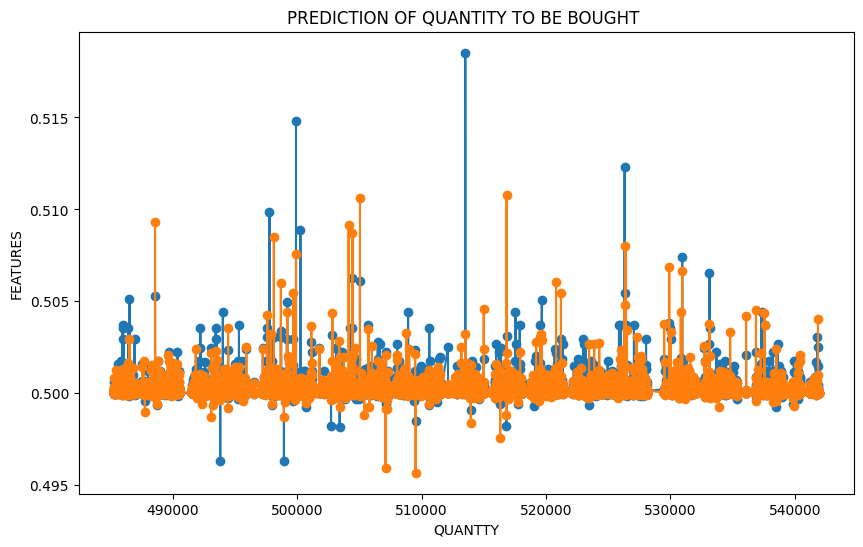

In [99]:
# VISULAIZATION OF THE RESULTS

plt.figure(figsize=(10,6))
plt.plot(df.index[-len(y_test):], y_test, label="REAL VALUES", marker="o")
plt.plot(df.index[-len(y_predict):], y_predict, label="PREDICTED VALUES", marker="o")
plt.title("PREDICTION OF QUANTITY TO BE BOUGHT ")
plt.xlabel("QUANTTY")
plt.ylabel("FEATURES")

In [108]:
# DECISION TREE REGRESSION FOR PREDICTION

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV



In [109]:

# Define the parameter grid
param_grid = {'max_leaf_nodes': [25, 50, 100, 250, 500]}

# Initialize the Decision Tree Regression model
model = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with the Decision Tree model and parameter grid
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Print the best parameters
print("Best Parameters:", best_params)

# Make predictions on the test set using the best estimator
y_pred = best_estimator.predict(X_test)

# Evaluate the model using mean squared error and R^2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Best Parameters: {'max_leaf_nodes': 500}
Mean Squared Error: 4.725673967775952e-09
R^2 Score: 0.9280460046386391


<function matplotlib.pyplot.show(close=None, block=None)>

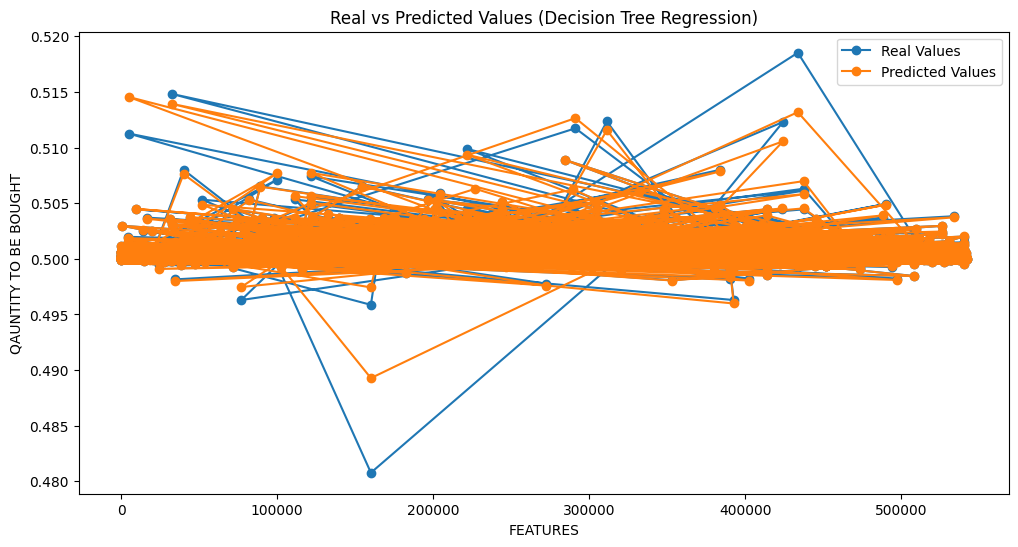

In [117]:
# PLOTING THE PREDICTION
import warnings
warnings.filterwarnings
# Plot the real vs predicted values
# Plot the real vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Real Values', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')
plt.title('Real vs Predicted Values (Decision Tree Regression)')
plt.xlabel('FEATURES')
plt.ylabel('QAUNTITY TO BE BOUGHT')
plt.legend()
plt.show


In [113]:
# IMPLIMENTING RANDOM FOREST TREE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Initialize and train the Random Forest Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



<ipython-input-113-a0aa21750cf4>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


Mean Squared Error: 1.632913574901369e-09
R^2 Score: 0.9751369526135014


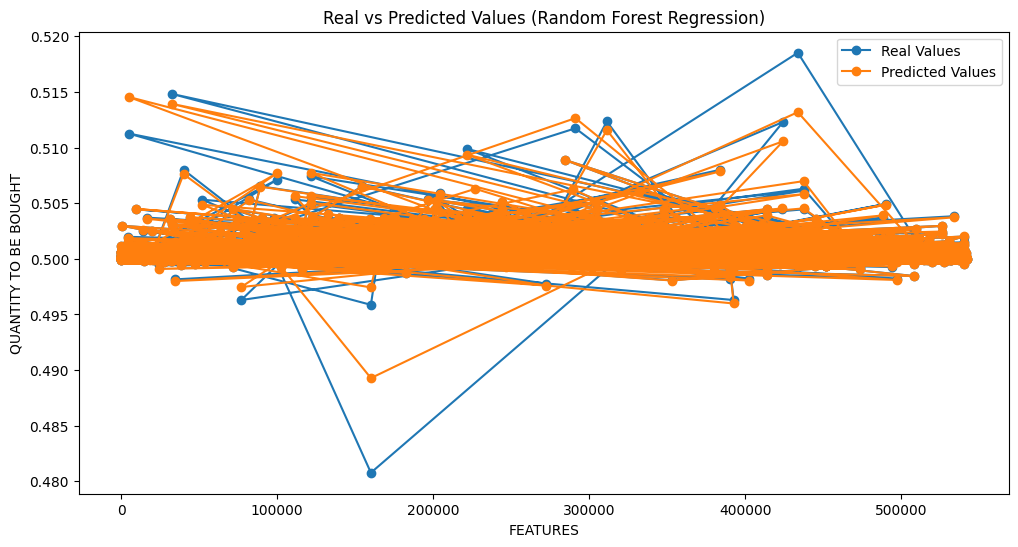

In [116]:
# Plot the real vs predicted values
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Real Values', marker='o')
plt.plot(y_test.index, y_pred, label='Predicted Values', marker='o')
plt.title('Real vs Predicted Values (Random Forest Regression)')
plt.xlabel('FEATURES')
plt.ylabel('QUANTITY TO BE BOUGHT')
plt.legend()
plt.show()
